# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


# Import data

In [2]:
data = pd.read_csv('cc_ohlcv_by_exchange_landing_202109130813.csv')
data

,id,created_at,open,high,low,price,volume,amount,symbol,exchange,timestamp,date
0,722202,2021-09-12 07:48:47,0.0000,0.0000,0.0000,0.000,0.00,NaN,alpha-usdt,okex,1544400000000,2018-12-10
1,737217,2021-09-12 07:52:12,0.0365,0.0371,0.0349,0.036,44107.49,1225208.056,lrc-usdt,okex,1544400000000,2018-12-10
2,729209,2021-09-12 07:51:11,0.0000,0.0000,0.0000,0.000,0.00,NaN,lrc-usd,kraken,1544400000000,2018-12-10
3,725205,2021-09-12 07:49:25,0.0000,0.0000,0.0000,0.000,0.00,NaN,gno-usdt,binance,1544400000000,2018-12-10
4,718198,2021-09-12 07:47:40,0.0000,0.0000,0.0000,0.000,0.00,NaN,xvs-usdt,poloniex,1544400000000,2018-12-10
...,...,...,...,...,...,...,...,...,...,...,...,...
837636,856331,2021-09-12 23:10:24,2.2780,2.4230,2.2200,2.302,250774.28,108937.567,audio-usdt,ftx,1631404800000,2021-09-12
837637,771256,2021-09-12 07:57:58,32967.2600,33346.2000,32400.0000,33122.950,2571640.50,77.639,yfi-usd,coinbase,1631404800000,2021-09-12
837638,773276,2021-09-12 07:58:19,33002.3800,33347.5400,32463.8500,32986.990,156480.21,4.744,yfi-usd,gemini,1631404800000,2021-09-12
837639,773270,2021-09-12 07:58:09,32950.0000,33325.0000,32360.0000,33070.000,327118.65,9.892,yfi-usd,ftx,1631404800000,2021-09-12


# Assess data
Now, we will take a look at the dataset to get general information about it.

In [3]:
df = data.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 837641 entries, 0 to 837640
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          837641 non-null  int64  
 1   created_at  837641 non-null  object 
 2   open        837641 non-null  float64
 3   high        837641 non-null  float64
 4   low         837641 non-null  float64
 5   price       837641 non-null  float64
 6   volume      837639 non-null  float64
 7   amount      428939 non-null  float64
 8   symbol      837641 non-null  object 
 9   exchange    837641 non-null  object 
 10  timestamp   837641 non-null  int64  
 11  date        837641 non-null  object 
dtypes: float64(6), int64(2), object(4)
memory usage: 76.7+ MB


#### Note:
- missing values for column 'volume' and 'amount'



# Clean data
### Drop missing values for column 'volume'

In [5]:
# check the rows with missing values
df[df['volume'].isnull()]

,id,created_at,open,high,low,price,volume,amount,symbol,exchange,timestamp,date
276153,112491,2021-09-12 03:43:51,191.1600,192.2700,184.5900,186.6800,NaN,NaN,eth-usdt,binance,1573084800000,2019-11-07
503335,166818,2021-09-12 03:49:23,0.1442,0.1442,0.1425,0.1437,NaN,NaN,ada-usd,bitfinex,1596672000000,2020-08-06


We do not have any precise values to substitute the missing values for those rows in column 'volume'. Besides that, there are only 2 missing rows, so we just delete those rows.

In [6]:
# delete those rows
df = df[df['volume'].notnull()]
# test
df[df['volume'].isnull()]

,id,created_at,open,high,low,price,volume,amount,symbol,exchange,timestamp,date


### Substitute the rows with missing values in column 'amount'
By observing the dataset, the amount follows the equation: 
`amount = volume/price`

Now we check the rows with missing values.

In [7]:
df[df['amount'].isnull()]

,id,created_at,open,high,low,price,volume,amount,symbol,exchange,timestamp,date
0,722202,2021-09-12 07:48:47,0.0,0.0,0.0,0.0,0.0,NaN,alpha-usdt,okex,1544400000000,2018-12-10
2,729209,2021-09-12 07:51:11,0.0,0.0,0.0,0.0,0.0,NaN,lrc-usd,kraken,1544400000000,2018-12-10
3,725205,2021-09-12 07:49:25,0.0,0.0,0.0,0.0,0.0,NaN,gno-usdt,binance,1544400000000,2018-12-10
4,718198,2021-09-12 07:47:40,0.0,0.0,0.0,0.0,0.0,NaN,xvs-usdt,poloniex,1544400000000,2018-12-10
5,741221,2021-09-12 07:53:04,0.0,0.0,0.0,0.0,0.0,NaN,srm-usdt,ftx,1544400000000,2018-12-10
...,...,...,...,...,...,...,...,...,...,...,...,...
825183,789285,2021-09-12 08:01:11,0.0,0.0,0.0,0.0,0.0,NaN,bnt-usdt,kucoin,1630195200000,2021-08-29
825212,726198,2021-09-12 07:49:25,0.0,0.0,0.0,0.0,0.0,NaN,gno-usdt,binance,1630195200000,2021-08-29
826577,789286,2021-09-12 08:01:11,0.0,0.0,0.0,0.0,0.0,NaN,bnt-usdt,kucoin,1630281600000,2021-08-30
827478,789287,2021-09-12 08:01:11,0.0,0.0,0.0,0.0,0.0,NaN,bnt-usdt,kucoin,1630368000000,2021-08-31


As you see above, if we apply the formula to find the missing values for those rows, It will be conflicted because the price is 0. In this situation, we just simply assign 0 for those missing values. 

In [8]:
# use fillna() to substitute 0 with missing values
df['amount'].fillna(0, inplace=True)
# test
df[df['amount'].isnull()]

,id,created_at,open,high,low,price,volume,amount,symbol,exchange,timestamp,date


# Analyze data
### Historical performance for each symbol in the dataset
Firstly, we will check how many distinct symbols are in our dataset.

In [9]:
# use len() and set() to get the number of distinct symbols and exchanges in the dataset
print('Number of distinct symbols: {}'.format(len(set(df['symbol']))))
print('Number of distinct cryptocurrency exchanges: {}'.format(len(set(df['exchange']))))

Number of distinct symbols: 202
Number of distinct cryptocurrency exchanges: 15


There are 202 different symbols and 15 cryptocurrency exchanges in the dataset. To make it easier, we will calculate the average price for each symbol for each date from all cryptocurrency exchanges. However, if we use the mean() method right away, we will get the wrong outcome because of the occurrence of 0 in column 'price'. Therefore, we will replace 0 with NaN first then apply the mean() method to get the desired outcome. 

In [10]:
# replace 0 with NaN in column 'price'
df['price'].replace(0, np.nan, inplace=True)
# test
df.head()

,id,created_at,open,high,low,price,volume,amount,symbol,exchange,timestamp,date
0,722202,2021-09-12 07:48:47,0.0000,0.0000,0.0000,NaN,0.00,0.000,alpha-usdt,okex,1544400000000,2018-12-10
1,737217,2021-09-12 07:52:12,0.0365,0.0371,0.0349,0.036,44107.49,1225208.056,lrc-usdt,okex,1544400000000,2018-12-10
2,729209,2021-09-12 07:51:11,0.0000,0.0000,0.0000,NaN,0.00,0.000,lrc-usd,kraken,1544400000000,2018-12-10
3,725205,2021-09-12 07:49:25,0.0000,0.0000,0.0000,NaN,0.00,0.000,gno-usdt,binance,1544400000000,2018-12-10
4,718198,2021-09-12 07:47:40,0.0000,0.0000,0.0000,NaN,0.00,0.000,xvs-usdt,poloniex,1544400000000,2018-12-10


Next, we classify the dataset by the symbol and the date. Then, we can apply the mean() method to get the average price for each symbol for each date.

In [11]:
# Classify the dataset
new_df = df.groupby(['symbol', 'date']).mean()
new_df

id      open     high       low     price  \
symbol    date                                                          
1inch-usd 2018-12-10  128415.6  0.000000  0.00000  0.000000       NaN   
          2018-12-11  128416.6  0.000000  0.00000  0.000000       NaN   
          2018-12-12  128417.6  0.000000  0.00000  0.000000       NaN   
          2018-12-13  128418.6  0.000000  0.00000  0.000000       NaN   
          2018-12-14  128419.6  0.000000  0.00000  0.000000       NaN   
...                        ...       ...      ...       ...       ...   
zrx-usdt  2021-09-08  856001.5  1.009375  1.04725  0.902025  1.009250   
          2021-09-09  856002.5  1.009250  1.07825  0.986075  1.069000   
          2021-09-10  856003.5  1.069000  1.10875  0.969875  1.004625   
          2021-09-11  856004.5  1.004625  1.04500  0.990275  1.024250   
          2021-09-12  856005.5  1.024250  1.07525  0.987250  1.058250   

                            volume        amount     timestamp  
symbol    date                                                  
1inch-usd 2018-12-10  0.000000e+00  0.000000e+00  1.544400e+12  
          2018-12-11  0.000000e+00  0.000000e+00  1.544486e+12  
          2018-12-12  0.000000e+00  0.000000e+00  1.544573e+12  
          2018-12-13  0.000000e+00  0.000000e+00  1.544659e+12  
          2018-12-14  0.000000e+00  0.000000e+00  1.544746e+12  
...                            ...           ...           ...  
zrx-usdt  2021-09-08  7.889440e+06  7.828141e+06  1.631059e+12  
          2021-09-09  5.072038e+06  4.737764e+06  1.631146e+12  
          2021-09-10  5.451576e+06  5.408792e+06  1.631232e+12  
          2021-09-11  1.879638e+06  1.823500e+06  1.631318e+12  
          2021-09-12  2.153975e+06  2.028352e+06  1.631405e+12  

[203616 rows x 8 columns]

In [12]:
# assign the number of distinct symbols to a variable for later usage
symbol = set(df['symbol'])

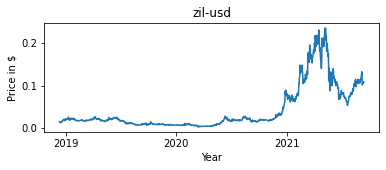

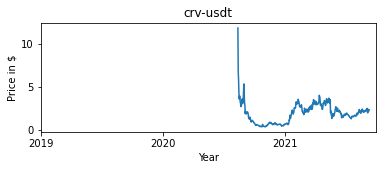

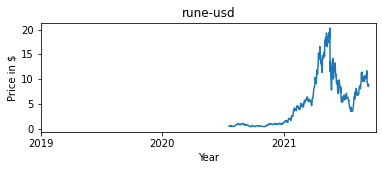

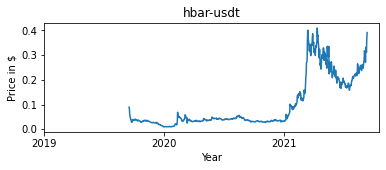

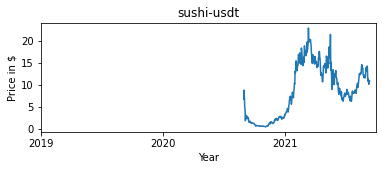

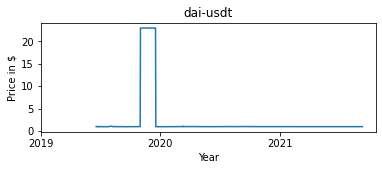

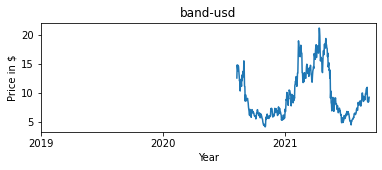

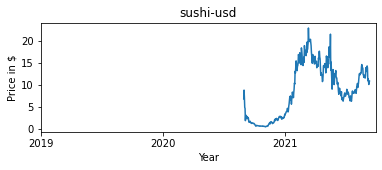

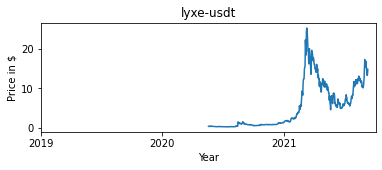

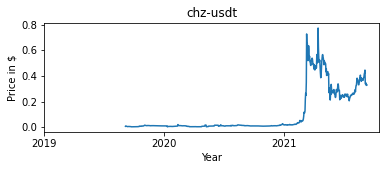

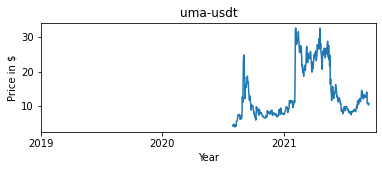

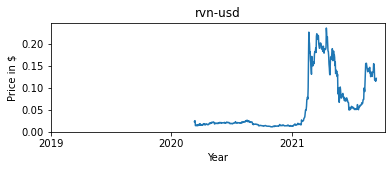

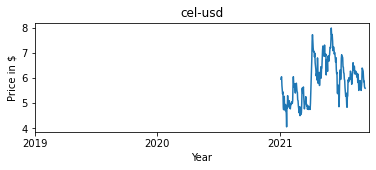

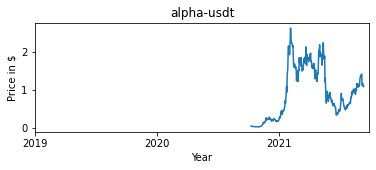

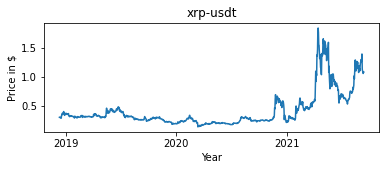

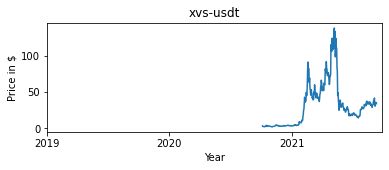

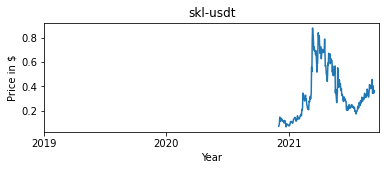

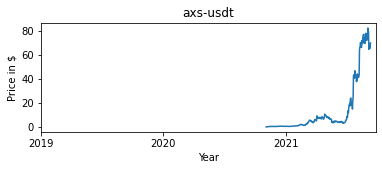

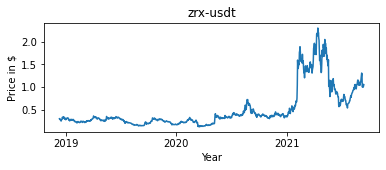

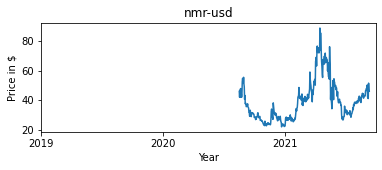

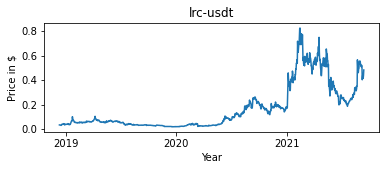

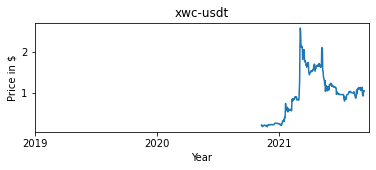

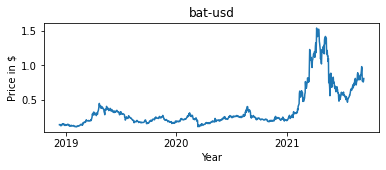

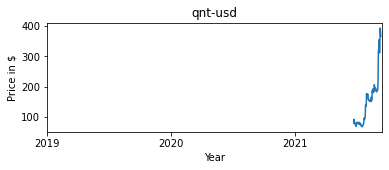

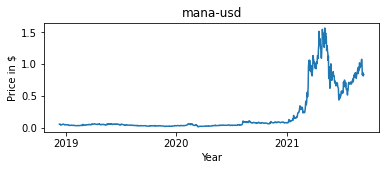

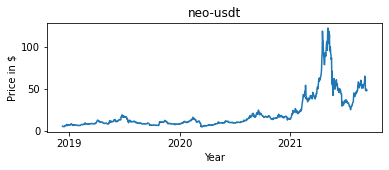

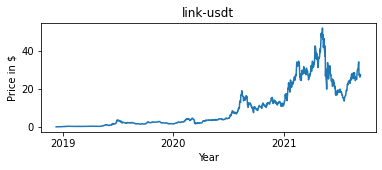

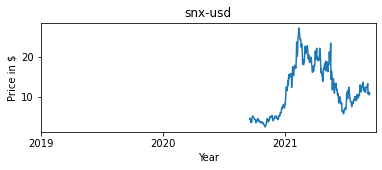

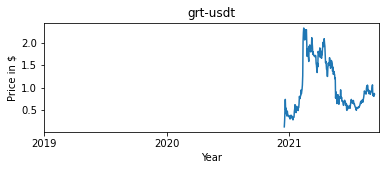

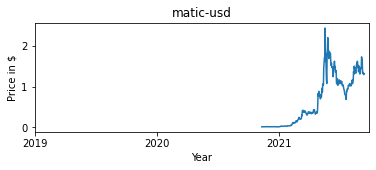

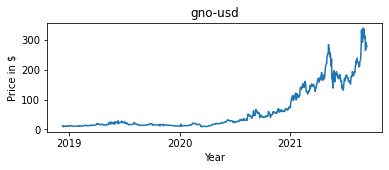

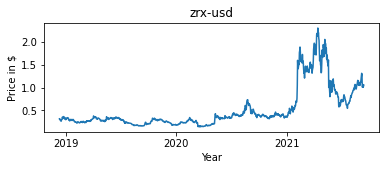

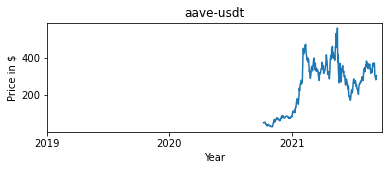

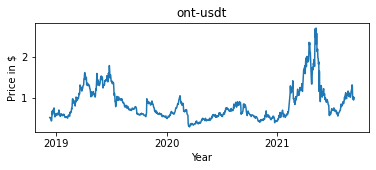

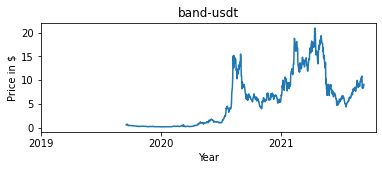

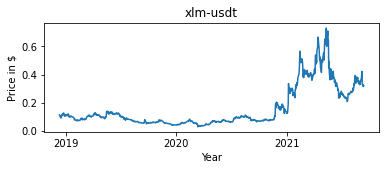

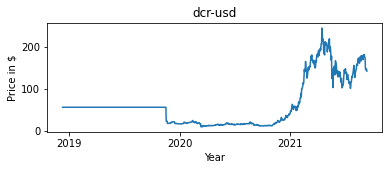

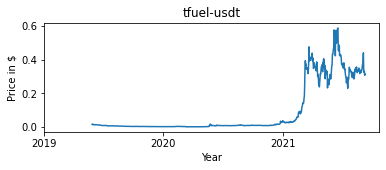

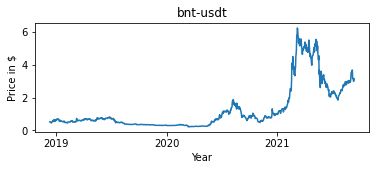

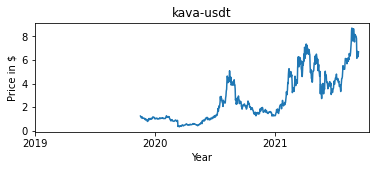

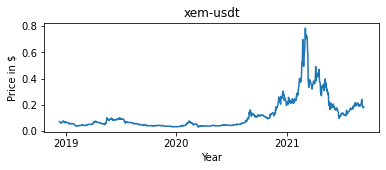

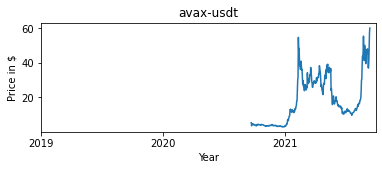

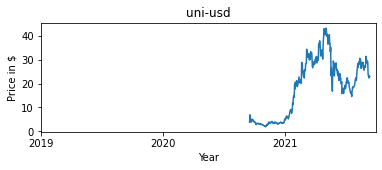

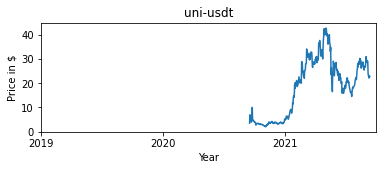

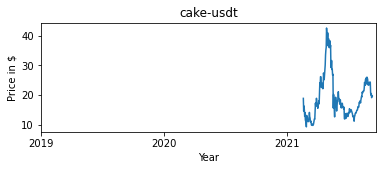

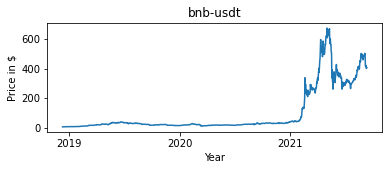

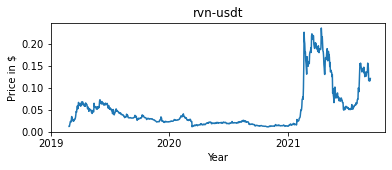

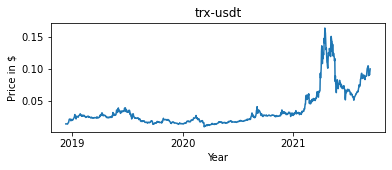

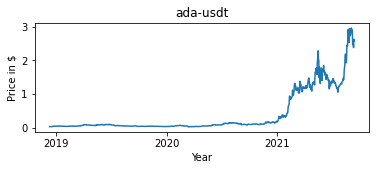

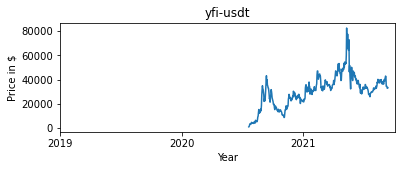

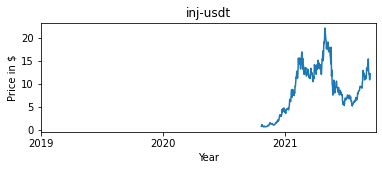

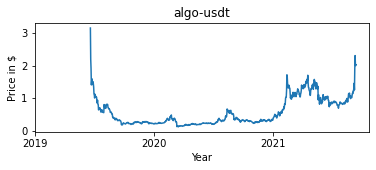

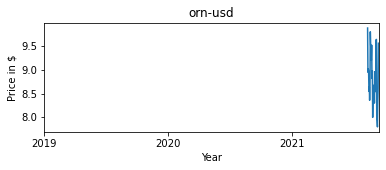

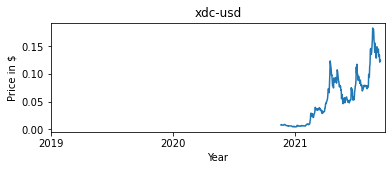

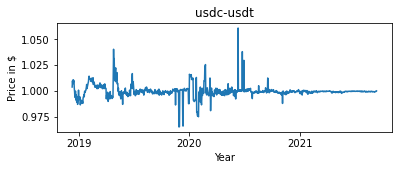

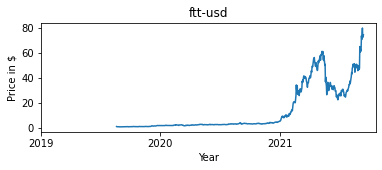

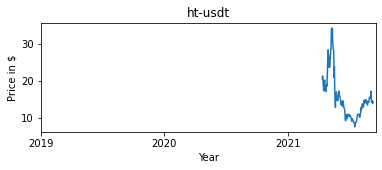

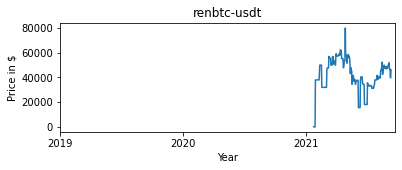

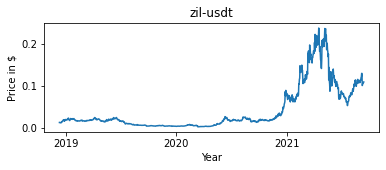

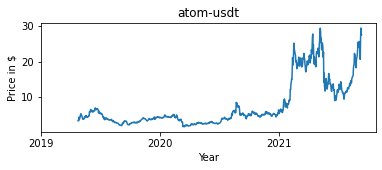

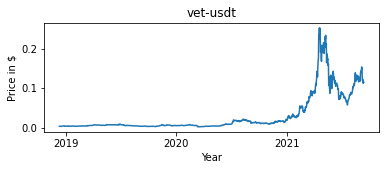

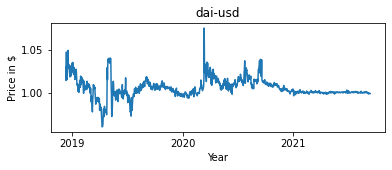

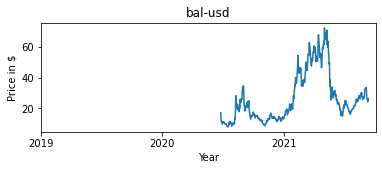

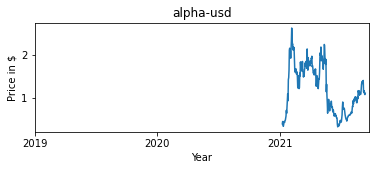

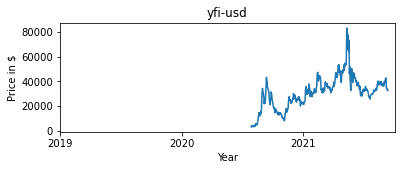

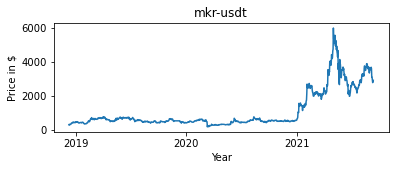

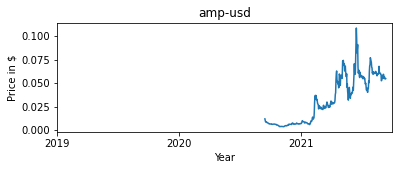

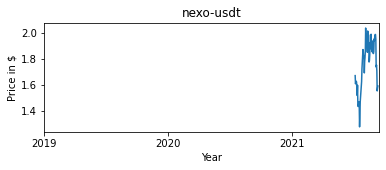

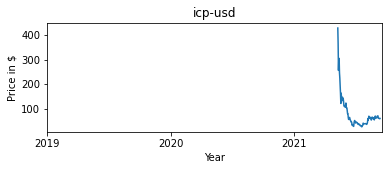

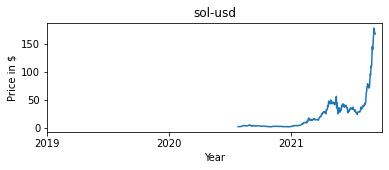

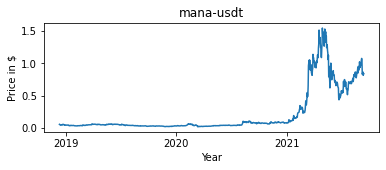

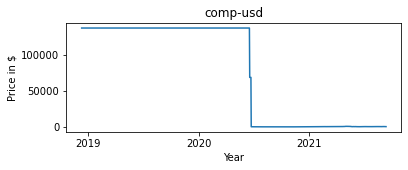

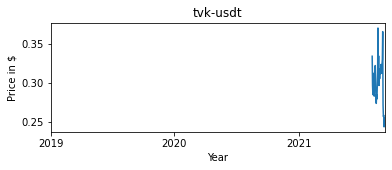

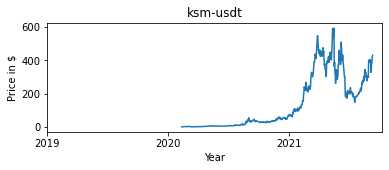

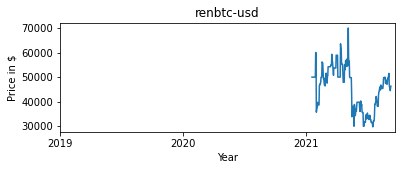

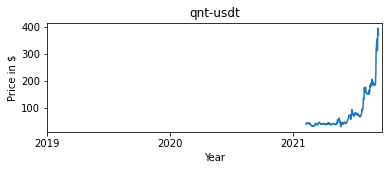

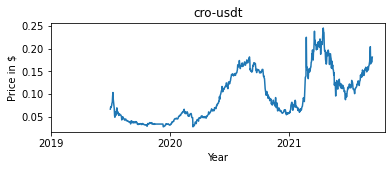

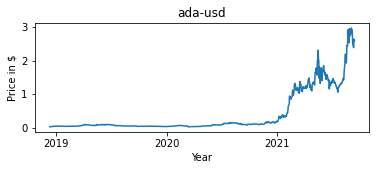

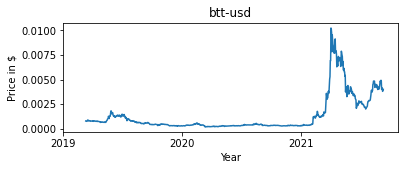

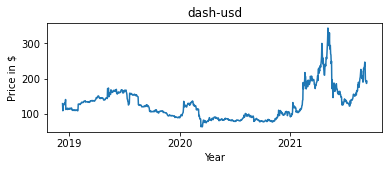

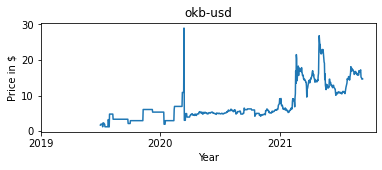

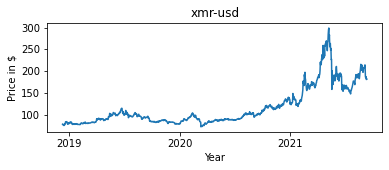

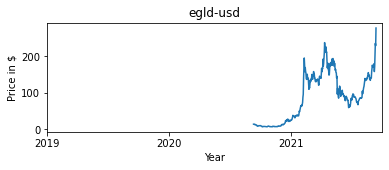

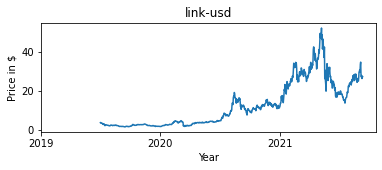

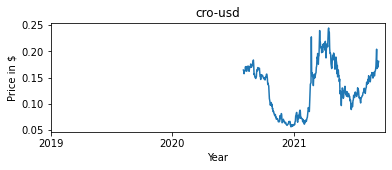

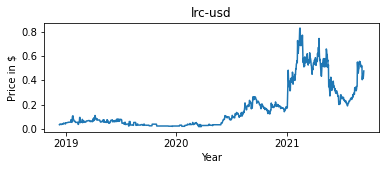

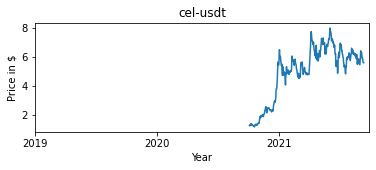

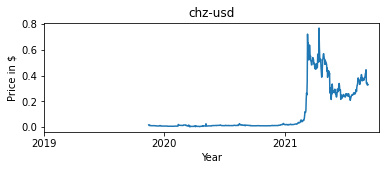

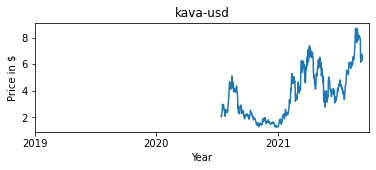

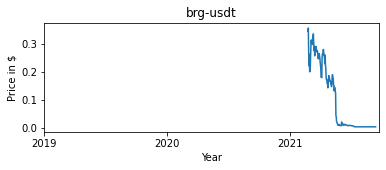

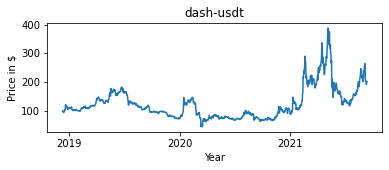

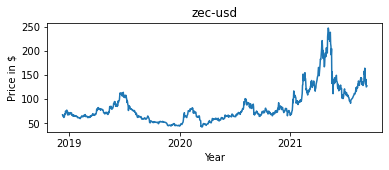

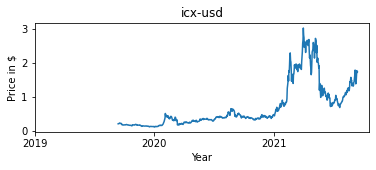

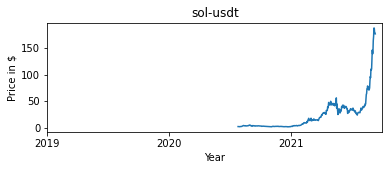

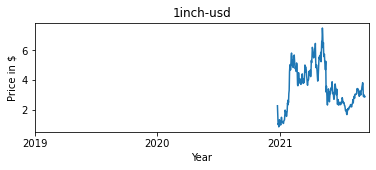

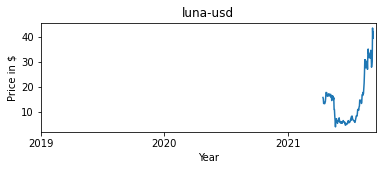

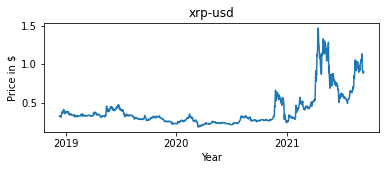

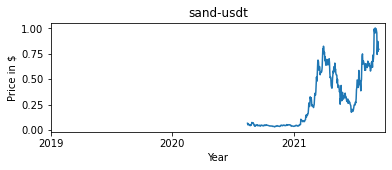

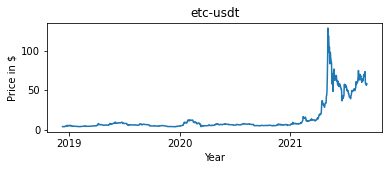

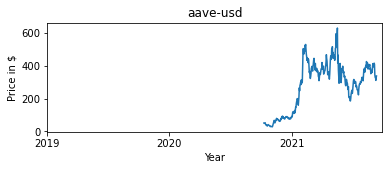

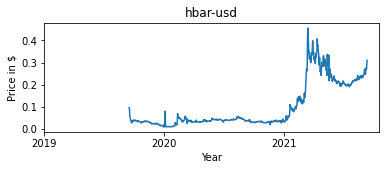

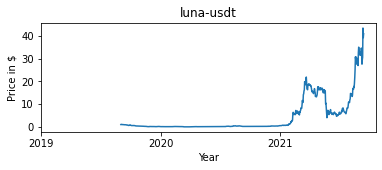

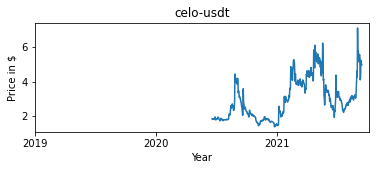

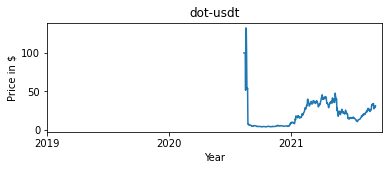

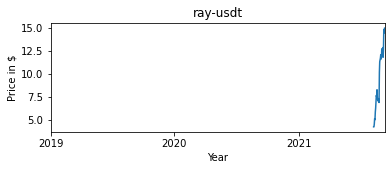

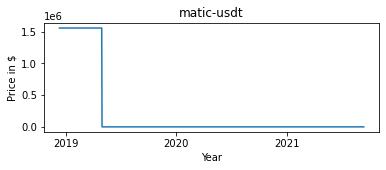

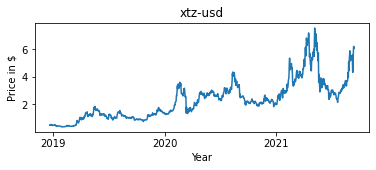

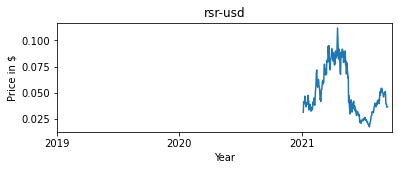

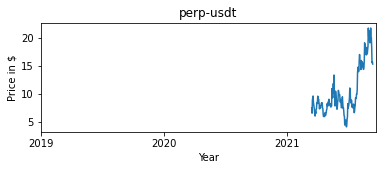

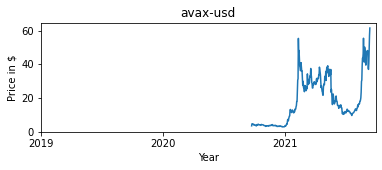

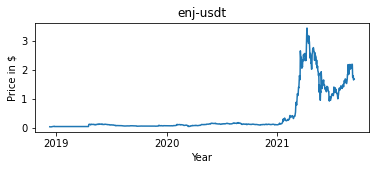

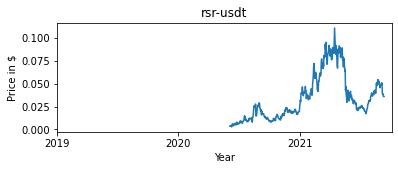

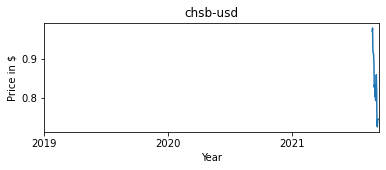

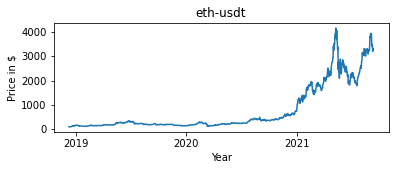

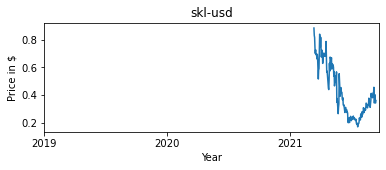

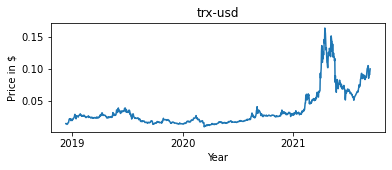

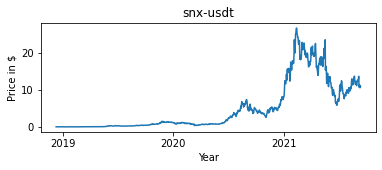

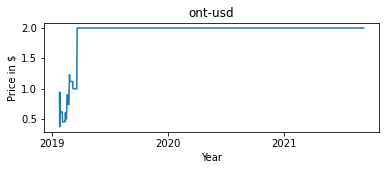

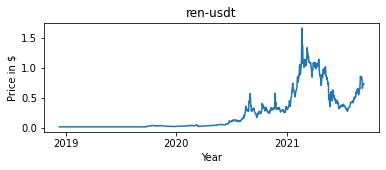

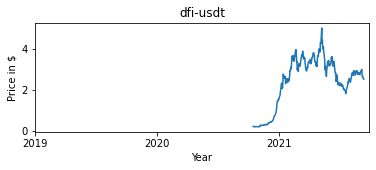

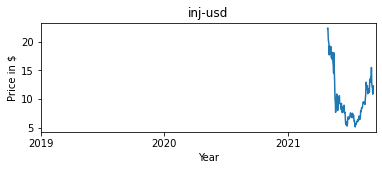

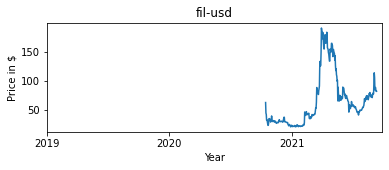

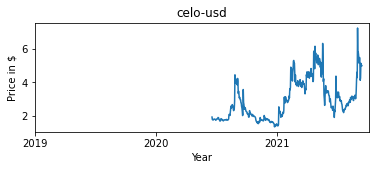

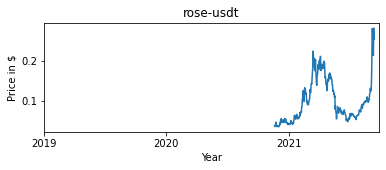

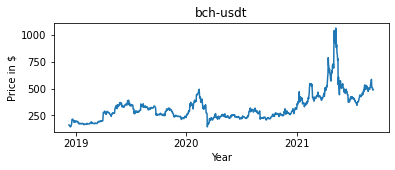

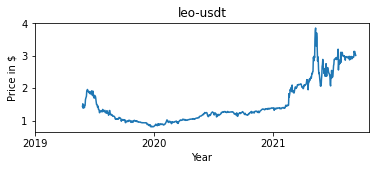

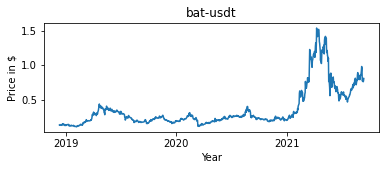

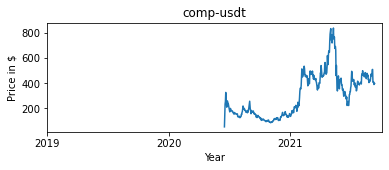

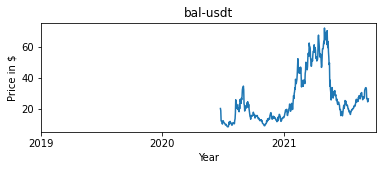

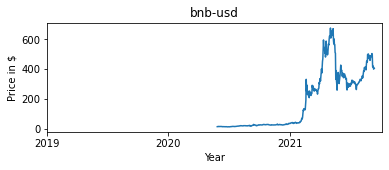

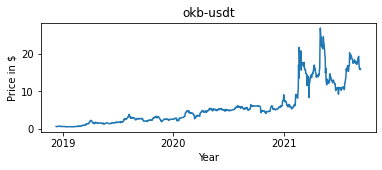

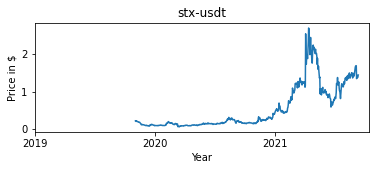

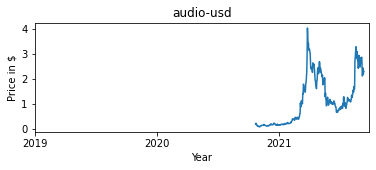

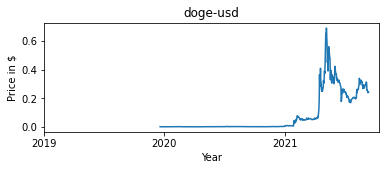

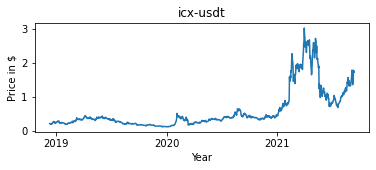

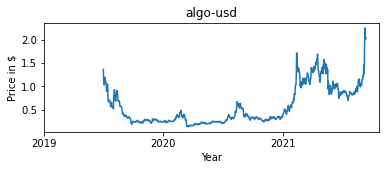

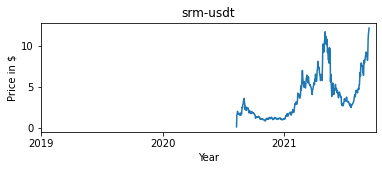

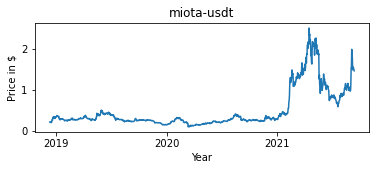

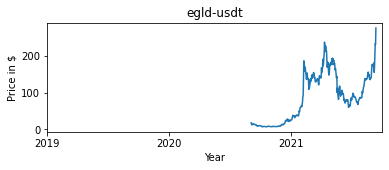

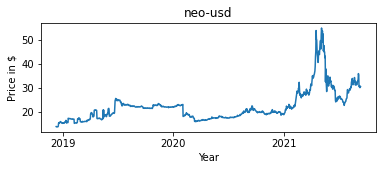

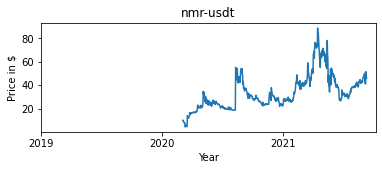

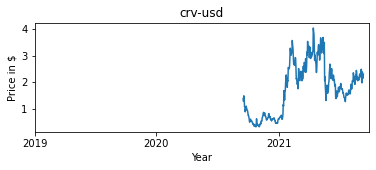

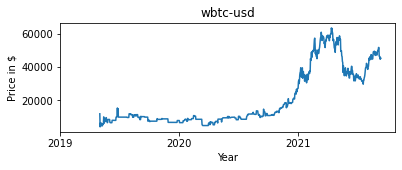

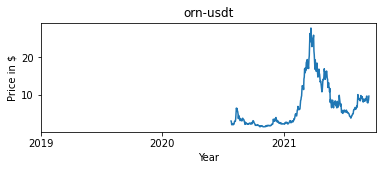

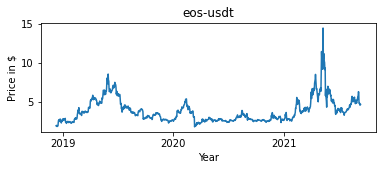

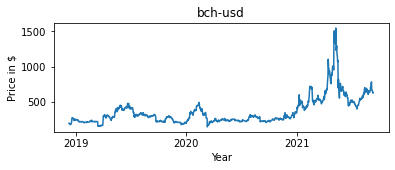

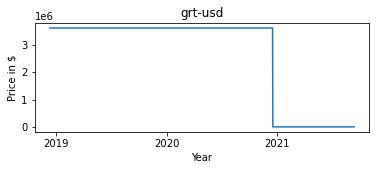

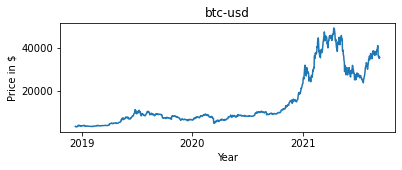

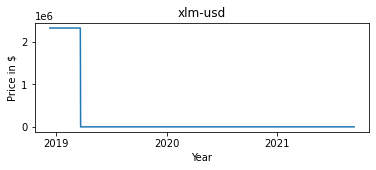

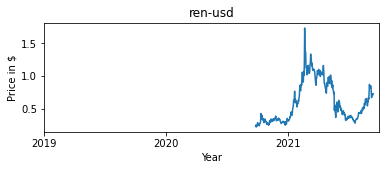

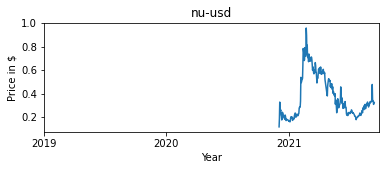

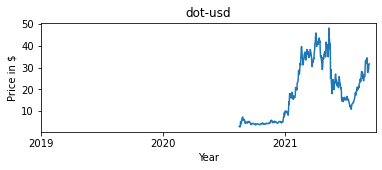

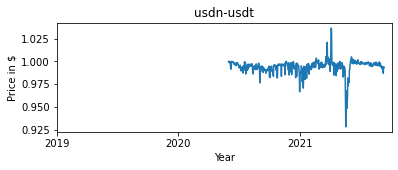

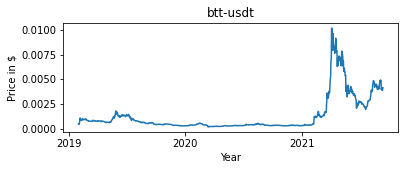

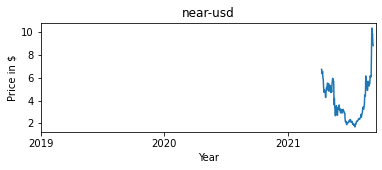

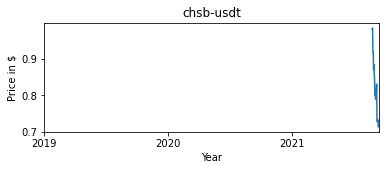

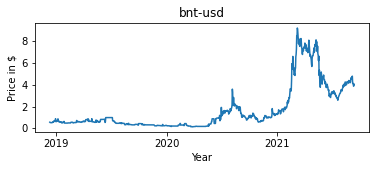

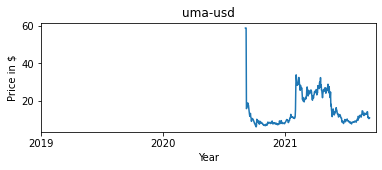

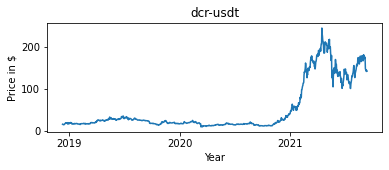

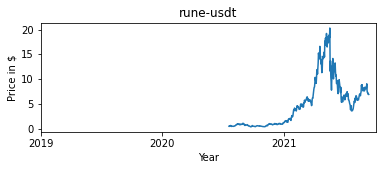

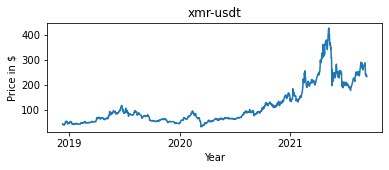

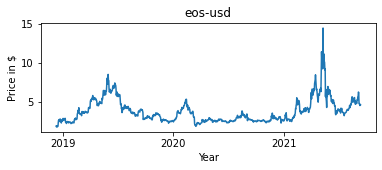

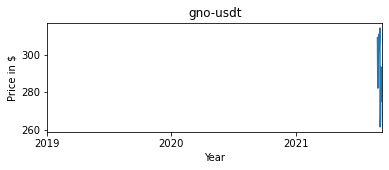

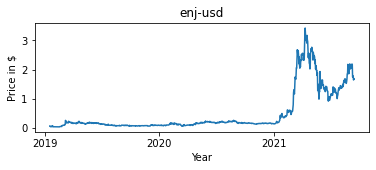

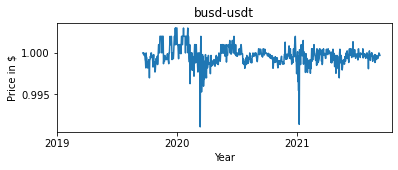

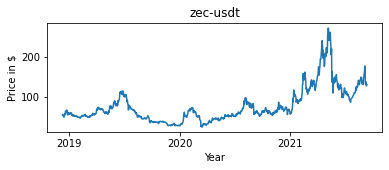

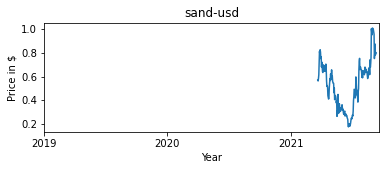

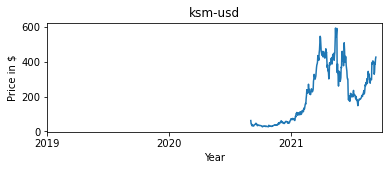

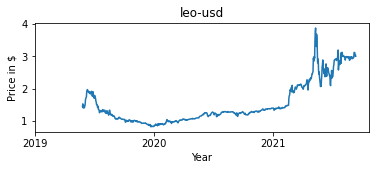

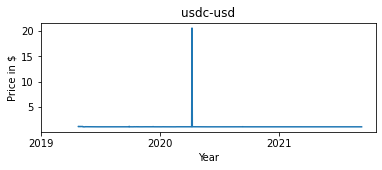

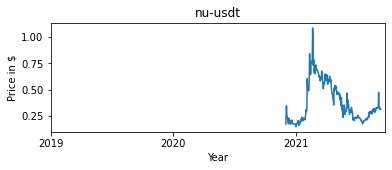

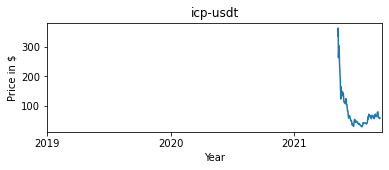

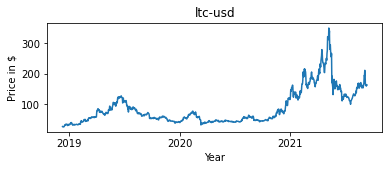

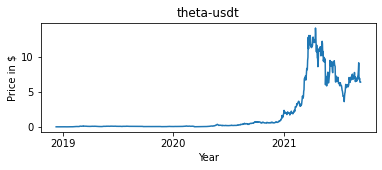

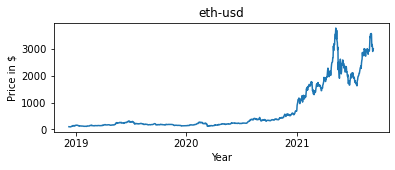

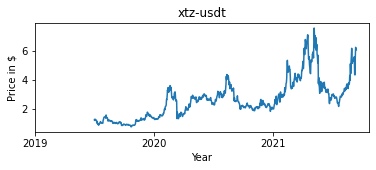

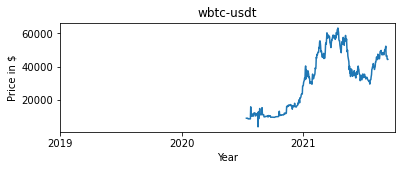

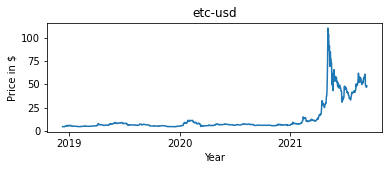

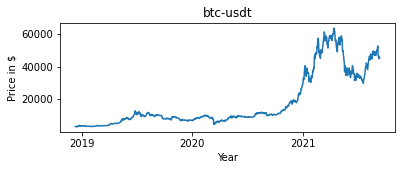

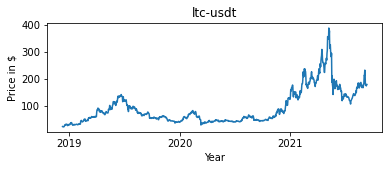

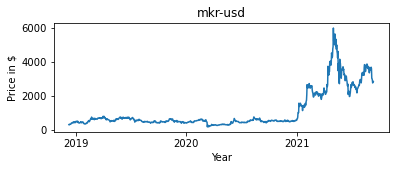

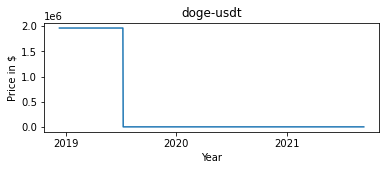

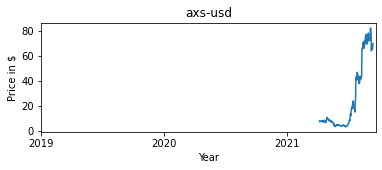

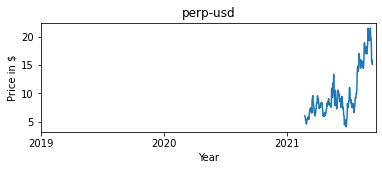

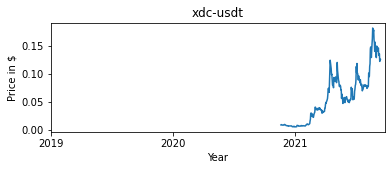

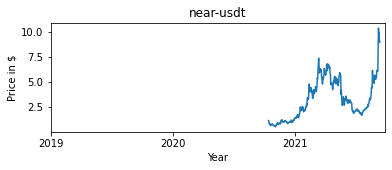

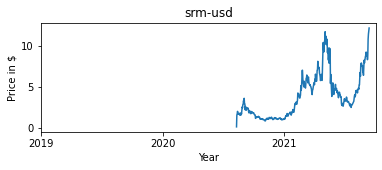

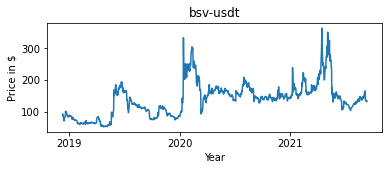

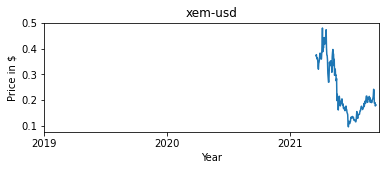

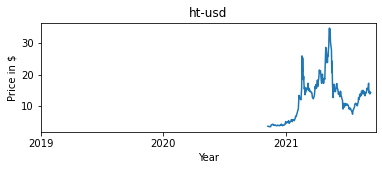

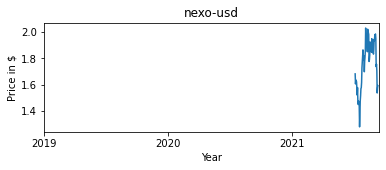

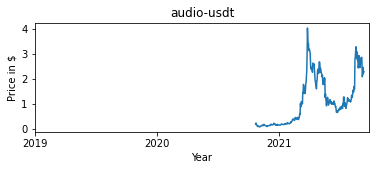

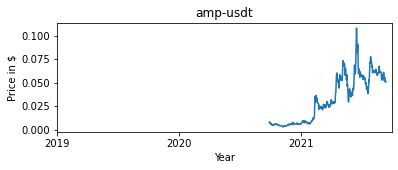

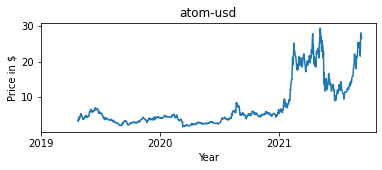

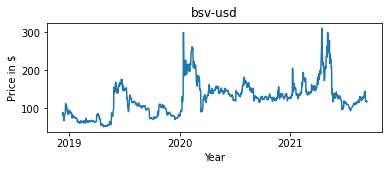

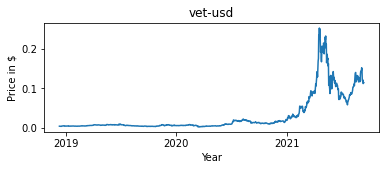

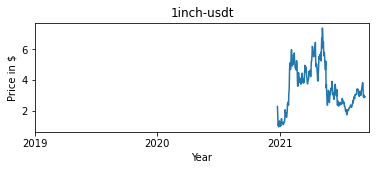

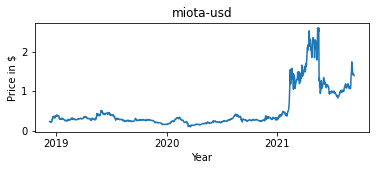

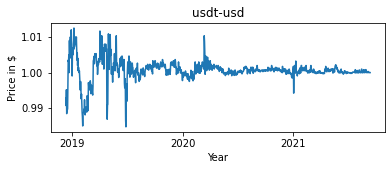

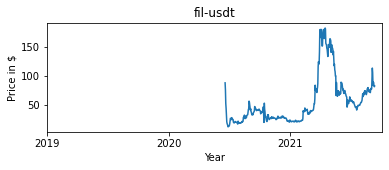

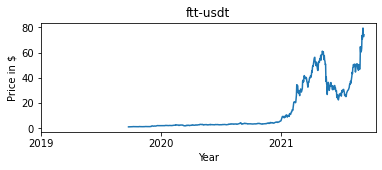

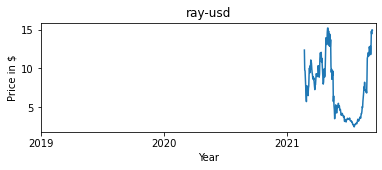

In [20]:
for i in symbol:
    plt.figure(figsize=[6,2])
    plt.plot(symbol_df.price.index, symbol_df.price) # plot the chart
    plt.ylabel('Price in $')
    plt.xlabel('Year')
    plt.xticks(['2019-01-01','2020-01-01', '2021-01-01'], [2019, 2020, 2021])
    plt.title(i)
    plt.show()
    print()